# Task 1 - Analysis on ML Test Scores by Siddharth Sharma

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
sd = pd.read_csv('/content/scores_data.csv')
sd.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [3]:
sd.shape, sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


((149, 3), None)

## Clean and Convert Score Column

In [4]:
sd.columns = sd.columns.str.strip()
sd['Score'] = sd['Score'].str.strip().str.split('/').str[0].astype(float)
sd.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6.0
1,AI_ELITE_7,uid_148,6.0
2,AI_ELITE_7,uid_147,7.0
3,AI_ELITE_7,uid_146,7.0
4,AI_ELITE_7,uid_145,4.0


## Distribution of Users across batches

Number of users per batch:
Batch
AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: count, dtype: int64


/tmp/ipython-input-1677886079.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sd, x='Batch', palette='viridis')


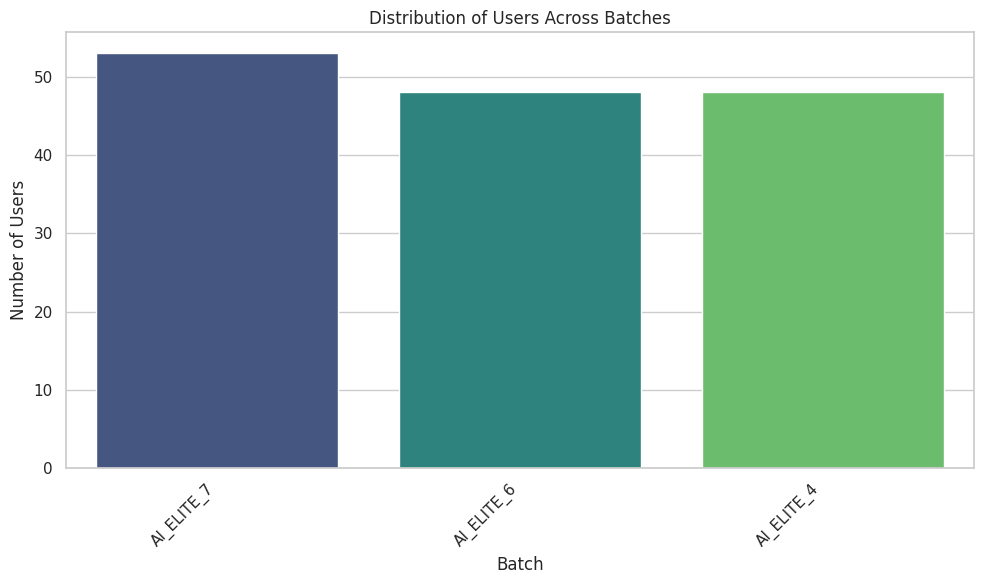

In [5]:
print("Number of users per batch:")
batch_counts = sd['Batch'].value_counts()
print(batch_counts)


plt.figure(figsize=(10, 6))
sns.countplot(data=sd, x='Batch', palette='viridis')
plt.title('Distribution of Users Across Batches')
plt.xlabel('Batch')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [6]:
batch_stats = sd.groupby('Batch')['Score'].agg(['mean', 'median', 'std'])
print("Batch-wise descriptive statistics for scores:")
print(batch_stats)

Batch-wise descriptive statistics for scores:
                mean  median       std
Batch                                 
AI_ELITE_4  3.791667     4.0  1.443376
AI_ELITE_6  4.229167     4.0  1.640441
AI_ELITE_7  5.056604     5.0  1.446682


## Boxplot presentation

/tmp/ipython-input-428101732.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sd, x='Batch', y='Score', palette='pastel')


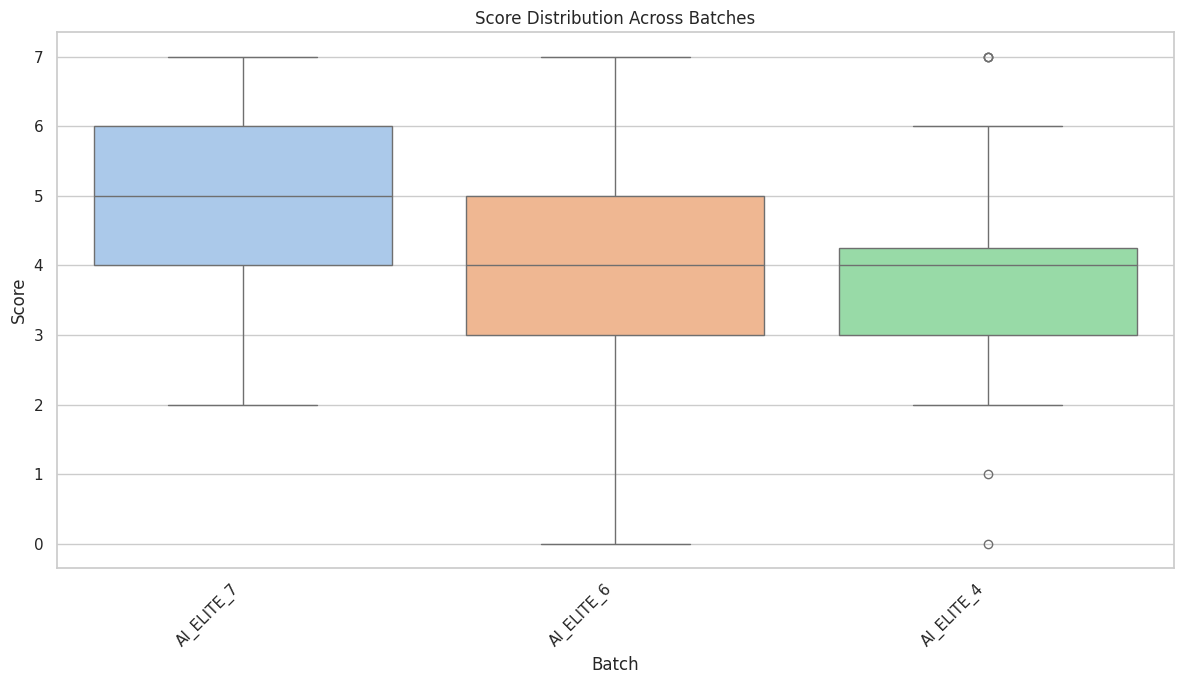

In [7]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=sd, x='Batch', y='Score', palette='pastel')
plt.title('Score Distribution Across Batches')
plt.xlabel('Batch')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Violin Graph

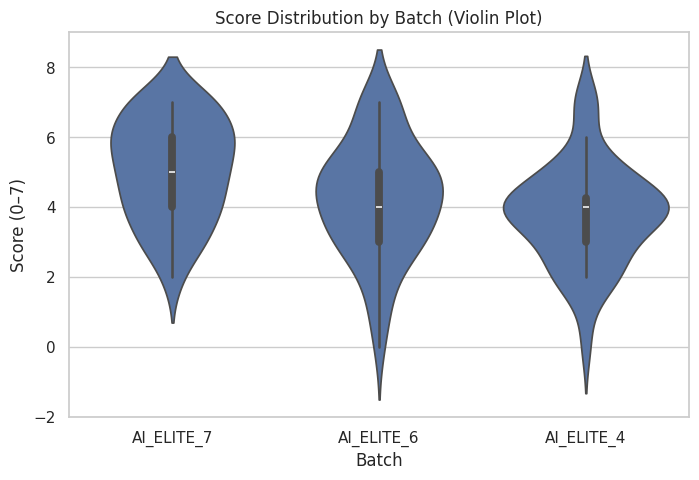

In [9]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=sd, x="Batch", y="Score", inner="box")
plt.title("Score Distribution by Batch (Violin Plot)")
plt.xlabel("Batch")
plt.ylabel("Score (0–7)")
plt.show()

## Histogram

/tmp/ipython-input-2266338603.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Batch")


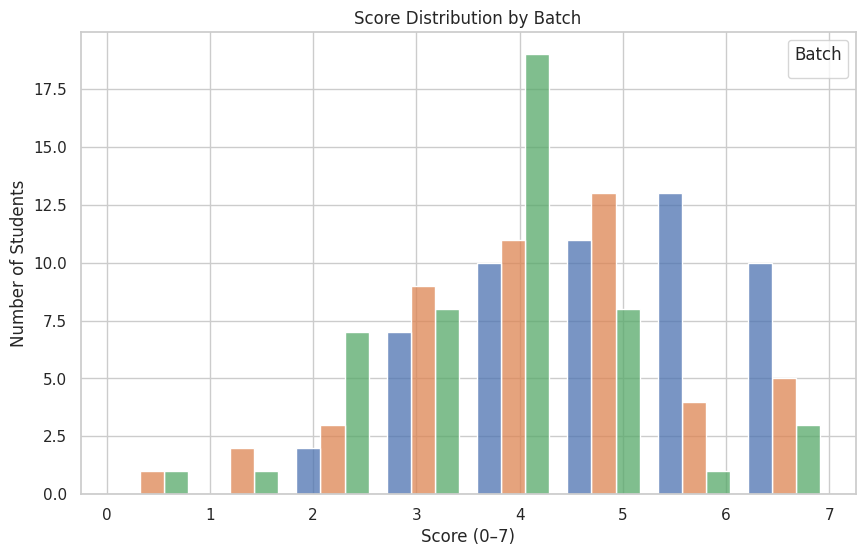

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=sd, x="Score", hue="Batch", multiple="dodge", bins=8, shrink=0.8)
plt.title("Score Distribution by Batch")
plt.xlabel("Score (0–7)")
plt.ylabel("Number of Students")
plt.legend(title="Batch")
plt.show()